# Capstone Project - House Price Prediction

### Current situation :
The current approach is to estimate the house price is manual and based on expert opinions or individual's judgment. Most the cases price is decided based on similar property price in that locality and does not consider all the potentail factors that might influenced the property price.AND, mojaority of the cases that leads to incorrect estimatation of house price and financial loss or oppotunity loss for both buyer and seller.

### Opportunity for improvement:
We can build an sophisticated predictive model to estimate the house price which will consider all the factors that are effecting price of the property. And, also this model will helps buyer/seller to understand which factor/factors is/are most significant one and how they are influcneing the property price. Based on the input parameters it will predict the best value of the property price and reduce the manual interven.

### Data requirement and challenges:
House price not only depends on some of the known factors like location and square footage, there are several others macro/micro economic factors that influence the property prices. We need both the present and past data of all the factors to estimate the house price and also helps us assess the model performance. 
Collect the data from diffent platfrom and sources and consolidated it in a sinlge database/dataset is one of the biggest challenge for building the model. And, we need more than 1000 observations to build a sophisticated and stable model which add more challenges to the exsisting problem. 
But here, we already have dataset with us to our excercise. The entire dataset has 23 variables and 21613 observations. 

##### Data dictionary :
1. cid: a notation for a house   
2. dayhours: Date house was sold  
3. price: Price is prediction target  
4. room_bed: Number of Bedrooms/House  
5. room_bath: Number of bathrooms/bedrooms  
6. living_measure: square footage of the home  
7. lot_measure: quare footage of the lot  
8. ceil: Total floors (levels) in house  
9. coast: House which has a view to a waterfront  
10. sight: Has been viewed  
11. condition: How good the condition is (Overall)  
12. quality: grade given to the housing unit, based on grading system  
13. ceil_measure: square footage of house apart from basement  
14. basement_measure: square footage of the basement  
15. yr_built: Built Year  
16. yr_renovated: Year when house was renovated  
17. zipcode: zip  
18. lat: Latitude coordinate  
19. long: Longitude coordinate  
20. living_measure15: Living room area in 2015(implies-- some renovations) This might or might not have affected the lotsize area  
21. lot_measure15: lotSize area in 2015(implies-- some renovations)  
22. furnished: Based on the quality of room
23. total_area: Measure of both living and lot  

## 1. Importing dataset and libraries

#### 1.1 Importing required libraries

In [2]:
# Dataframe and Array
import pandas as pd
import numpy as np

# Graph and visualization
%matplotlib inline
import seaborn as sns
import matplotlib.pylab as plt

# Data preprocessing and transformation

from sklearn.model_selection  import cross_val_score, train_test_split
from sklearn.preprocessing import StandardScaler
from scipy.stats import zscore

# Modelling algorithm

from sklearn.linear_model import LinearRegression
from sklearn.neighbors import NearestNeighbors
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import AdaBoostRegressor

# Clustering
from sklearn.cluster import KMeans

# Feature selection
from sklearn.decomposition import PCA

# Warnings
import warnings
warnings.filterwarnings("ignore")

# Control search
from sklearn.model_selection import GridSearchCV

# Performance and accuracy
from sklearn import metrics
from sklearn.metrics import accuracy_score

#### 1.2 Importing dataset

In [3]:
house_df = pd.read_csv('innercity.csv')

In [4]:
house_df.head()

cid         dayhours   price  room_bed  room_bath  living_measure  \
0  3034200666  20141107T000000  808100         4       3.25            3020   
1  8731981640  20141204T000000  277500         4       2.50            2550   
2  5104530220  20150420T000000  404000         3       2.50            2370   
3  6145600285  20140529T000000  300000         2       1.00             820   
4  8924100111  20150424T000000  699000         2       1.50            1400   

   lot_measure  ceil  coast  sight     ...      basement  yr_built  \
0        13457   1.0      0      0     ...             0      1956   
1         7500   1.0      0      0     ...           800      1976   
2         4324   2.0      0      0     ...             0      2006   
3         3844   1.0      0      0     ...             0      1916   
4         4050   1.0      0      0     ...             0      1954   

   yr_renovated  zipcode      lat     long  living_measure15  lot_measure15  \
0             0    98133  47.7174 -122.336              2120           7553   
1             0    98023  47.3165 -122.386              2260           8800   
2             0    98038  47.3515 -121.999              2370           4348   
3             0    98133  47.7049 -122.349              1520           3844   
4             0    98115  47.6768 -122.269              1900           5940   

   furnished  total_area  
0          1       16477  
1          0       10050  
2          0        6694  
3          0        4664  
4          0        5450  

[5 rows x 23 columns]

### 2 : Exploratory Data Analysis (EDA)

In [5]:
house_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 23 columns):
cid                 21613 non-null int64
dayhours            21613 non-null object
price               21613 non-null int64
room_bed            21613 non-null int64
room_bath           21613 non-null float64
living_measure      21613 non-null int64
lot_measure         21613 non-null int64
ceil                21613 non-null float64
coast               21613 non-null int64
sight               21613 non-null int64
condition           21613 non-null int64
quality             21613 non-null int64
ceil_measure        21613 non-null int64
basement            21613 non-null int64
yr_built            21613 non-null int64
yr_renovated        21613 non-null int64
zipcode             21613 non-null int64
lat                 21613 non-null float64
long                21613 non-null float64
living_measure15    21613 non-null int64
lot_measure15       21613 non-null int64
furnished           2

In [6]:
house_df.drop('cid',axis=1,inplace=True)

In [7]:
house_df.describe().transpose()

count           mean            std         min  \
price             21613.0  540182.158793  367362.231718  75000.0000   
room_bed          21613.0       3.370842       0.930062      0.0000   
room_bath         21613.0       2.114757       0.770163      0.0000   
living_measure    21613.0    2079.899736     918.440897    290.0000   
lot_measure       21613.0   15106.967566   41420.511515    520.0000   
ceil              21613.0       1.494309       0.539989      1.0000   
coast             21613.0       0.007542       0.086517      0.0000   
sight             21613.0       0.234303       0.766318      0.0000   
condition         21613.0       3.409430       0.650743      1.0000   
quality           21613.0       7.656873       1.175459      1.0000   
ceil_measure      21613.0    1788.390691     828.090978    290.0000   
basement          21613.0     291.509045     442.575043      0.0000   
yr_built          21613.0    1971.005136      29.373411   1900.0000   
yr_renovated      21613.0      84.402258     401.679240      0.0000   
zipcode           21613.0   98077.939805      53.505026  98001.0000   
lat               21613.0      47.560053       0.138564     47.1559   
long              21613.0    -122.213896       0.140828   -122.5190   
living_measure15  21613.0    1986.552492     685.391304    399.0000   
lot_measure15     21613.0   12768.455652   27304.179631    651.0000   
furnished         21613.0       0.196687       0.397503      0.0000   
total_area        21613.0   17186.867302   41589.081215   1423.0000   

                         25%          50%         75%           max  
price             321950.000  450000.0000  645000.000  7.700000e+06  
room_bed               3.000       3.0000       4.000  3.300000e+01  
room_bath              1.750       2.2500       2.500  8.000000e+00  
living_measure      1427.000    1910.0000    2550.000  1.354000e+04  
lot_measure         5040.000    7618.0000   10688.000  1.651359e+06  
ceil                   1.000       1.5000       2.000  3.500000e+00  
coast                  0.000       0.0000       0.000  1.000000e+00  
sight                  0.000       0.0000       0.000  4.000000e+00  
condition              3.000       3.0000       4.000  5.000000e+00  
quality                7.000       7.0000       8.000  1.300000e+01  
ceil_measure        1190.000    1560.0000    2210.000  9.410000e+03  
basement               0.000       0.0000     560.000  4.820000e+03  
yr_built            1951.000    1975.0000    1997.000  2.015000e+03  
yr_renovated           0.000       0.0000       0.000  2.015000e+03  
zipcode            98033.000   98065.0000   98118.000  9.819900e+04  
lat                   47.471      47.5718      47.678  4.777760e+01  
long                -122.328    -122.2300    -122.125 -1.213150e+02  
living_measure15    1490.000    1840.0000    2360.000  6.210000e+03  
lot_measure15       5100.000    7620.0000   10083.000  8.712000e+05  
furnished              0.000       0.0000       0.000  1.000000e+00  
total_area          7035.000    9575.0000   13000.000  1.652659e+06

##### Few observations could be made based on describe function output:
    1. Dataset is having a house with 11 and a house with 33 bedrooms. These may be outliers and we can have a look at this as we proceed.
    2. Maximum square feet is 13540 and minimum is 290. The data seems to be distributed.
    3. Maximum total area is 1652659 and minimum is 41589. From this too we can say data is distributed.
    4. Though the maximum is 33 and minimum is 0 for no of bedrooms in house, the median is 3 and 75% is 4. So most of the houses have 3 followed by 4 bedrooms.
    5. The data has room_bed feature which could be no of bathrooms in the house.If we observe the values, they are in decimals ranging from 0 to 8. So this could be thought of as a rating for the quality of the bathroom.
    6. Year in which the house was built is ranging from 1900 to 2015. from percentile values we can that houses built in 1951, 1975 and 1997 are sold more.

In [8]:
house_df.shape

(21613, 22)

In [9]:
#checking for null values
house_df.isnull().sum().sort_values(ascending = False)

total_area          0
furnished           0
price               0
room_bed            0
room_bath           0
living_measure      0
lot_measure         0
ceil                0
coast               0
sight               0
condition           0
quality             0
ceil_measure        0
basement            0
yr_built            0
yr_renovated        0
zipcode             0
lat                 0
long                0
living_measure15    0
lot_measure15       0
dayhours            0
dtype: int64

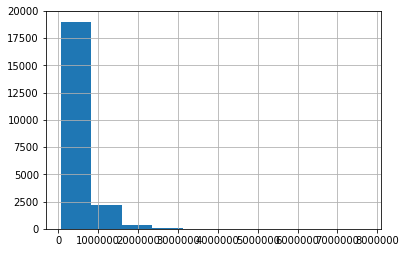

In [9]:
#Checking the distribution of the target variable: Price
house_df.price.hist()

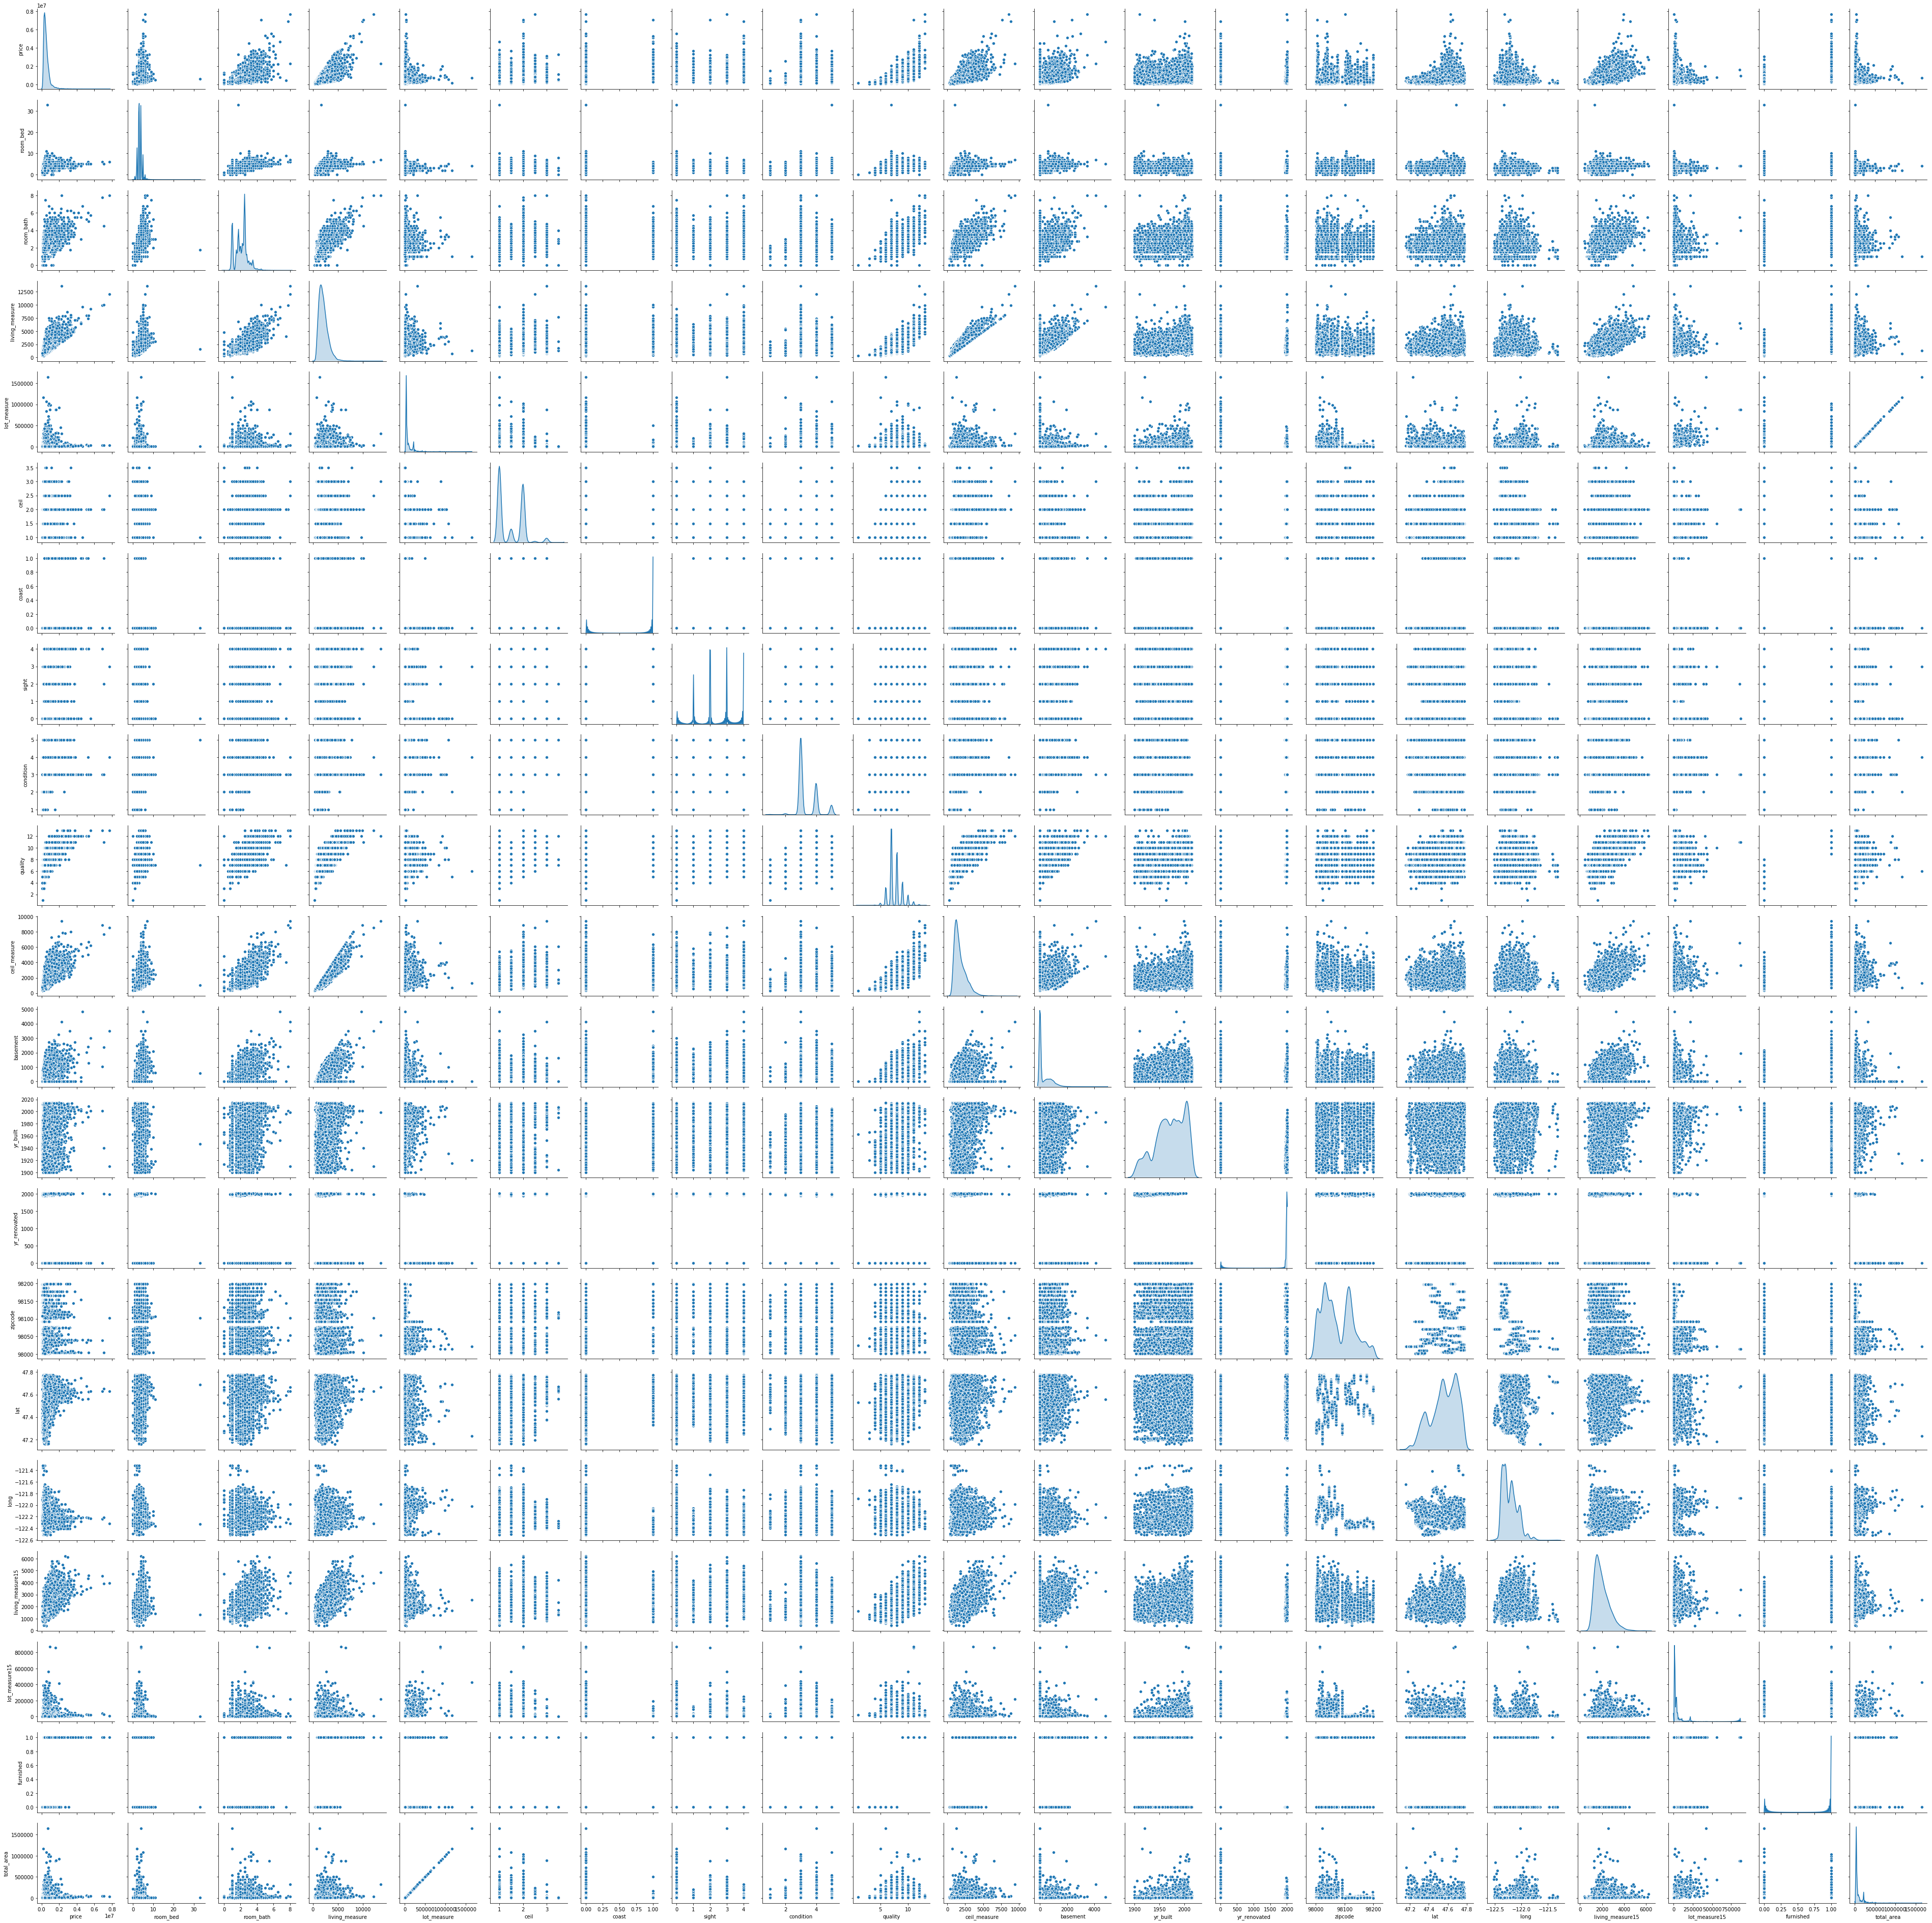

In [10]:
sns.pairplot(house_df, diag_kind='kde')

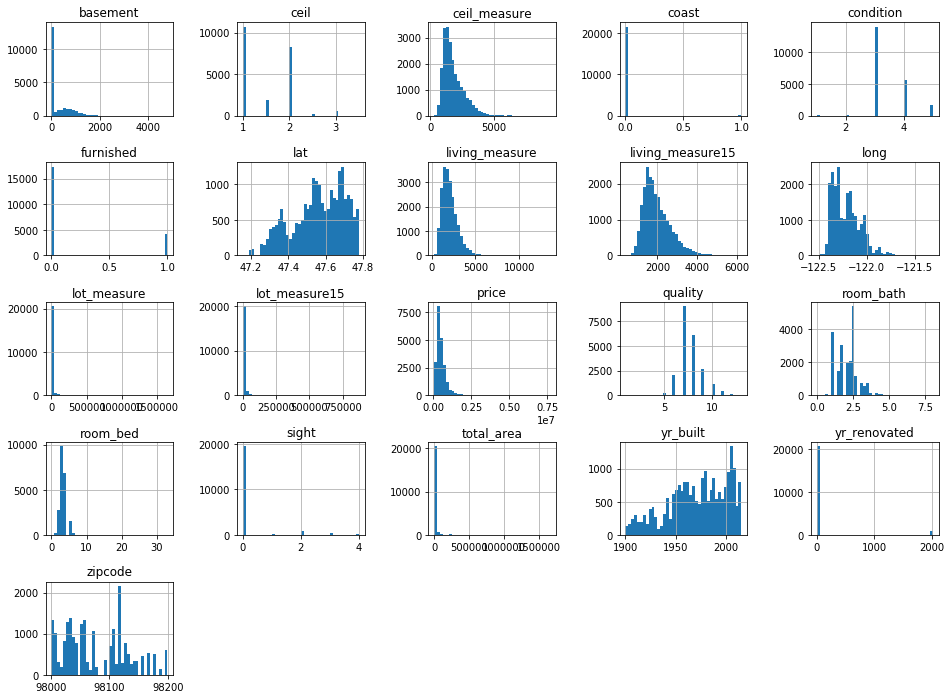

In [11]:
# Checking the distribution of all the numeric variables
house_df.hist(bins = 40, figsize=(16,12))
plt.subplots_adjust(wspace = 0.5, hspace = 0.5)
plt.show()

In [12]:
#Lets check the correlation of independant variables with dependant variable Price
corr = house_df.corr()
corr

price  room_bed  room_bath  living_measure  lot_measure  \
price             1.000000  0.308338   0.525134        0.702044     0.089655   
room_bed          0.308338  1.000000   0.515884        0.576671     0.031703   
room_bath         0.525134  0.515884   1.000000        0.754665     0.087740   
living_measure    0.702044  0.576671   0.754665        1.000000     0.172826   
lot_measure       0.089655  0.031703   0.087740        0.172826     1.000000   
ceil              0.256786  0.175429   0.500653        0.353949    -0.005201   
coast             0.266331 -0.006582   0.063744        0.103818     0.021604   
sight             0.397346  0.079532   0.187737        0.284611     0.074710   
condition         0.036392  0.028472  -0.124982       -0.058753    -0.008958   
quality           0.667463  0.356967   0.664983        0.762704     0.113621   
ceil_measure      0.605566  0.477600   0.685342        0.876597     0.183512   
basement          0.323837  0.303093   0.283770        0.435043     0.015286   
yr_built          0.053982  0.154178   0.506019        0.318049     0.053080   
yr_renovated      0.126442  0.018841   0.050739        0.055363     0.007644   
zipcode          -0.053168 -0.152668  -0.203866       -0.199430    -0.129574   
lat               0.306919 -0.008931   0.024573        0.052529    -0.085683   
long              0.021571  0.129473   0.223042        0.240223     0.229521   
living_measure15  0.585374  0.391638   0.568634        0.756420     0.144608   
lot_measure15     0.082456  0.029244   0.087175        0.183286     0.718557   
furnished         0.565991  0.259268   0.484923        0.632947     0.118883   
total_area        0.104796  0.044310   0.104050        0.194209     0.999763   

                      ceil     coast     sight  condition   quality  \
price             0.256786  0.266331  0.397346   0.036392  0.667463   
room_bed          0.175429 -0.006582  0.079532   0.028472  0.356967   
room_bath         0.500653  0.063744  0.187737  -0.124982  0.664983   
living_measure    0.353949  0.103818  0.284611  -0.058753  0.762704   
lot_measure      -0.005201  0.021604  0.074710  -0.008958  0.113621   
ceil              1.000000  0.023698  0.029444  -0.263768  0.458183   
coast             0.023698  1.000000  0.401857   0.016653  0.082775   
sight             0.029444  0.401857  1.000000   0.045990  0.251321   
condition        -0.263768  0.016653  0.045990   1.000000 -0.144674   
quality           0.458183  0.082775  0.251321  -0.144674  1.000000   
ceil_measure      0.523885  0.072075  0.167649  -0.158214  0.755923   
basement         -0.245705  0.080588  0.276947   0.174105  0.168392   
yr_built          0.489319 -0.026161 -0.053440  -0.361417  0.446963   
yr_renovated      0.006338  0.092885  0.103917  -0.060618  0.014414   
zipcode          -0.059121  0.030285  0.084827   0.003026 -0.184862   
lat               0.049614 -0.014274  0.006157  -0.014941  0.114084   
long              0.125419 -0.041910 -0.078400  -0.106500  0.198372   
living_measure15  0.279885  0.086463  0.280439  -0.092824  0.713202   
lot_measure15    -0.011269  0.030703  0.072575  -0.003406  0.119248   
furnished         0.347749  0.069882  0.220250  -0.121902  0.788621   
total_area        0.002637  0.023809  0.080693  -0.010219  0.130004   

                     ...      basement  yr_built  yr_renovated   zipcode  \
price                ...      0.323837  0.053982      0.126442 -0.053168   
room_bed             ...      0.303093  0.154178      0.018841 -0.152668   
room_bath            ...      0.283770  0.506019      0.050739 -0.203866   
living_measure       ...      0.435043  0.318049      0.055363 -0.199430   
lot_measure          ...      0.015286  0.053080      0.007644 -0.129574   
ceil                 ...     -0.245705  0.489319      0.006338 -0.059121   
coast                ...      0.080588 -0.026161      0.092885  0.030285   
sight                ...      0.276947 -0.053440      0.103917  0.084827   
condition    

In [10]:
#dayhours attribute contains string, converting it to date format for easier processing
labels = house_df['price']
conv_dates = [1 if values == 2014 else 0 for values in house_df.dayhours ]
house_df['dayhours'] = conv_dates

##### Get skewness of the features

In [11]:
skewness=[]
for i in house_df.columns:
    skewness.append(house_df[i].skew())
pd.DataFrame(data=skewness,index=house_df.columns,columns=['skewness']).sort_values(by='skewness',ascending=False)

skewness
lot_measure       13.060019
total_area        12.956067
coast             11.385108
lot_measure15      9.506743
yr_renovated       4.549493
price              4.021716
sight              3.395750
room_bed           1.974300
basement           1.577965
furnished          1.526232
living_measure     1.471555
ceil_measure       1.446664
living_measure15   1.108181
condition          1.032805
long               0.885053
quality            0.771103
ceil               0.616177
room_bath          0.511108
zipcode            0.405661
dayhours           0.000000
yr_built          -0.469805
lat               -0.485270

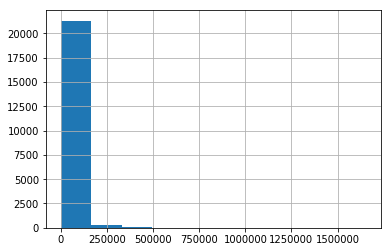

In [15]:
house_df.lot_measure.hist(bins=10)

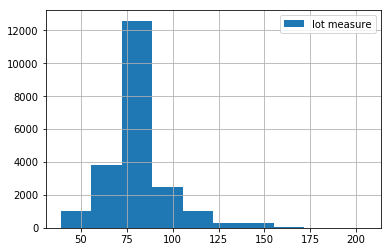

In [16]:
house_df['lot_measure'].apply(lambda x: np.log1p(x)**2).hist(bins=10,label='lot measure')
plt.legend()

as the transformed lot_measure attribute is having better distribution we can retain itto work further.

In [11]:
house_df.head()

dayhours   price  room_bed  room_bath  living_measure  lot_measure  ceil  \
0         0  808100         4       3.25            3020        13457   1.0   
1         0  277500         4       2.50            2550         7500   1.0   
2         0  404000         3       2.50            2370         4324   2.0   
3         0  300000         2       1.00             820         3844   1.0   
4         0  699000         2       1.50            1400         4050   1.0   

   coast  sight  condition     ...      basement  yr_built  yr_renovated  \
0      0      0          5     ...             0      1956             0   
1      0      0          3     ...           800      1976             0   
2      0      0          3     ...             0      2006             0   
3      0      0          4     ...             0      1916             0   
4      0      0          4     ...             0      1954             0   

   zipcode      lat     long  living_measure15  lot_measure15  furnished  \
0    98133  47.7174 -122.336              2120           7553          1   
1    98023  47.3165 -122.386              2260           8800          0   
2    98038  47.3515 -121.999              2370           4348          0   
3    98133  47.7049 -122.349              1520           3844          0   
4    98115  47.6768 -122.269              1900           5940          0   

   total_area  
0       16477  
1       10050  
2        6694  
3        4664  
4        5450  

[5 rows x 22 columns]

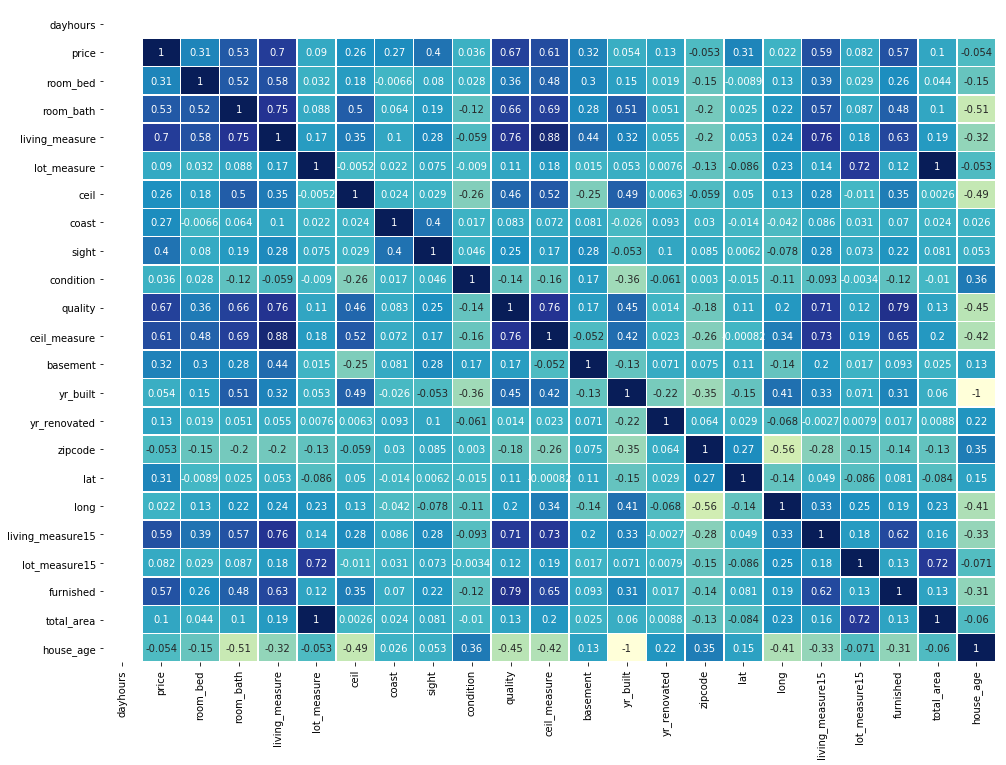

In [20]:
plt.figure(figsize=(16,12))
sns.heatmap(house_df.corr(),
            annot=True,
            linewidths=.5,
            center=0,
            cbar=False,
            cmap="YlGnBu")
plt.show()

From above heatmap we can state that:
1. Price of the house is highly correlated with square footage of the home (living_measure 0.7), grade given to the housing unit, based on grading system (quality 0.67), square footage of house apart from basement (ceil_measure 0.61)
2. Price is correlated with Living room area in 2015 (living_measure15 0.59), Based on the quality of room (furnished 0.57), Number of bathrooms/bedrooms (room_bath 0.53)
3. Price is to be correlated with attributes like has been viewed (sight 0.4), square footage of the basement (basement 0.32), Number of bedrooms/House (room_bed 0.31), House which has a view to a waterfront (coast 0.27), Total floors (levels) in house (ceil 0.26)
So we can try different plots to explore these correlations further.

In [12]:
#trying to get house many years ago the house was built
import datetime as DT
now = pd.Timestamp('now')
house_df['house_age'] = now.year - house_df.yr_built

In [13]:
house_df.head(20).tail()

dayhours   price  room_bed  room_bath  living_measure  lot_measure  ceil  \
15         0  361000         3       1.50            1200         7236   1.0   
16         0  459000         4       2.75            2790         6600   2.0   
17         0  200000         3       1.00            1480         5600   1.0   
18         0  403000         2       1.00            1100         3598   1.0   
19         0  327500         3       2.25            2310         7200   2.0   

    coast  sight  condition    ...      yr_built  yr_renovated  zipcode  \
15      0      0          3    ...          1975             0    98011   
16      0      0          3    ...          2000             0    98058   
17      0      0          4    ...          1947             0    98178   
18      0      0          4    ...          1926             0    98144   
19      0      0          3    ...          1990             0    98031   

        lat     long  living_measure15  lot_measure15  furnished  total_area  \
15  47.7390 -122.194              1680           7800          0        8436   
16  47.4362 -122.109              2900           6752          1        9390   
17  47.5045 -122.270              1350          11100          0        7080   
18  47.5738 -122.313              1240           3598          0        4698   
19  47.4051 -122.193              1960           7201          0        9510   

    house_age  
15         44  
16         19  
17         72  
18         93  
19         29  

[5 rows x 23 columns]

In [14]:
#trying to get how recently the house was renovated
house_df['recency'] = now.year - house_df.yr_renovated[house_df['yr_renovated'] != 0]

In [15]:
#for the houses which are not renoveted we are keeping house_age itself
house_df['recency'].fillna(house_df.house_age,inplace=True)

In [16]:
house_df.head(20).tail()

dayhours   price  room_bed  room_bath  living_measure  lot_measure  ceil  \
15         0  361000         3       1.50            1200         7236   1.0   
16         0  459000         4       2.75            2790         6600   2.0   
17         0  200000         3       1.00            1480         5600   1.0   
18         0  403000         2       1.00            1100         3598   1.0   
19         0  327500         3       2.25            2310         7200   2.0   

    coast  sight  condition   ...     yr_renovated  zipcode      lat     long  \
15      0      0          3   ...                0    98011  47.7390 -122.194   
16      0      0          3   ...                0    98058  47.4362 -122.109   
17      0      0          4   ...                0    98178  47.5045 -122.270   
18      0      0          4   ...                0    98144  47.5738 -122.313   
19      0      0          3   ...                0    98031  47.4051 -122.193   

    living_measure15  lot_measure15  furnished  total_area  house_age  recency  
15              1680           7800          0        8436         44     44.0  
16              2900           6752          1        9390         19     19.0  
17              1350          11100          0        7080         72     72.0  
18              1240           3598          0        4698         93     93.0  
19              1960           7201          0        9510         29     29.0  

[5 rows x 24 columns]

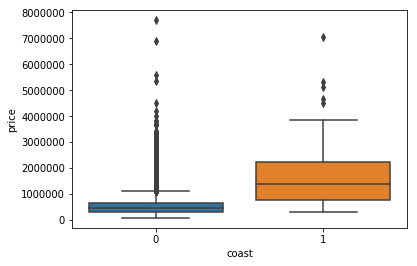

In [29]:
sns.boxplot(x="coast", y="price", data=house_df)

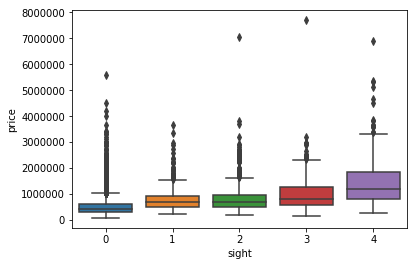

In [30]:
sns.boxplot(x="sight", y="price", data=house_df)

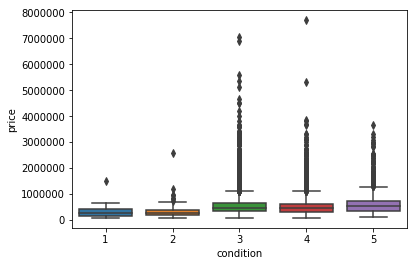

In [31]:
sns.boxplot(x="condition", y="price", data=house_df)

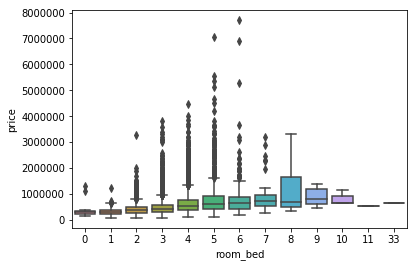

In [32]:
sns.boxplot(x="room_bed", y="price", data=house_df)

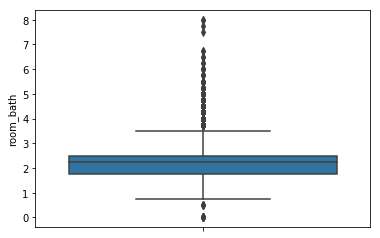

In [33]:
sns.boxplot(y="room_bath",  data=house_df)

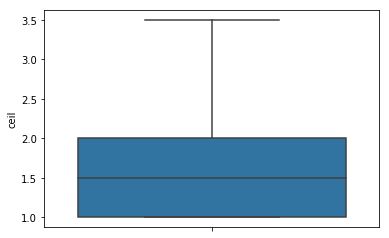

In [34]:
sns.boxplot(y="ceil",  data=house_df)

there are considerable outliers in all the features for which we have plotted boxplots above. We can consider removing outliers by replacing them with inter quartile range values

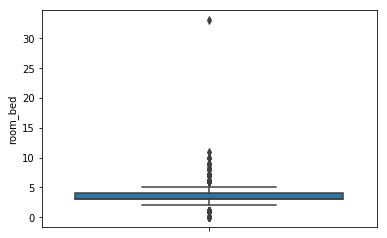

In [35]:
sns.boxplot(y="room_bed",  data=house_df)

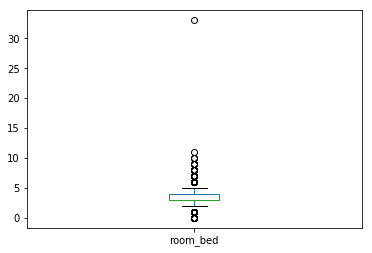

In [36]:
house_df.plot( y='room_bed', kind='box')
plt.show()

From the above boxplot we can say that, most of the houses sold are having bedrooms between 3 to 5. Lets futher plot a barchart for this. There are outliers with houses with very high/less no of bedrooms.
From simple data analysis, we can see that there is a house with 11 and 33 redrooms.

Text(0, 0.5, 'count')

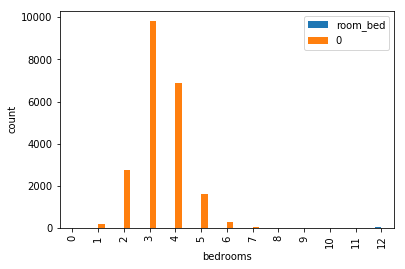

In [37]:
# house_df['room_bed'].value_counts().plot(kind='bar')
house_df.groupby('room_bed').size().reset_index().plot(kind='bar')
plt.xlabel('bedrooms')
plt.ylabel('count')

From bar plot we can conclude that houses with 3 bedrooms are sold most commonly, followed by that of 4. This information could be helpful for new developments.

Text(0.5, 1.0, 'price vs living measure')

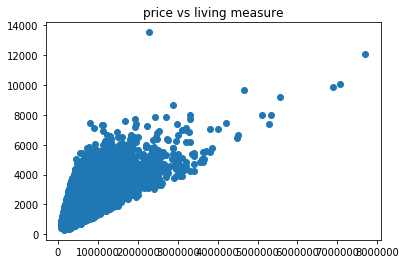

In [38]:
plt.scatter(house_df.price, house_df.living_measure)
plt.title("price vs living measure")

From above scatter plot, we can say that:
1. More the living measure, more the price of the house.
2. Data is scattered in linear direction.
3. There are some exceptions that houses with high living measure are sold less. This could be due to another factors affecting.

Text(0.5, 1.0, 'price vs living measure')

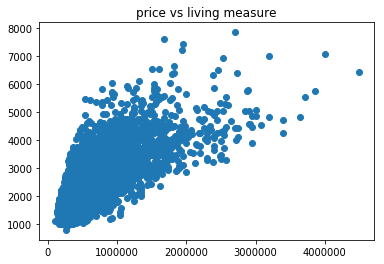

In [39]:
#we can check how the scatter plot looks like for houses with 4 bed rooms
plt.scatter(house_df.price[house_df.room_bed==4], house_df.living_measure[house_df.room_bed==4])
plt.title("price vs living measure")

Text(0.5, 1.0, 'price vs ceil measure')

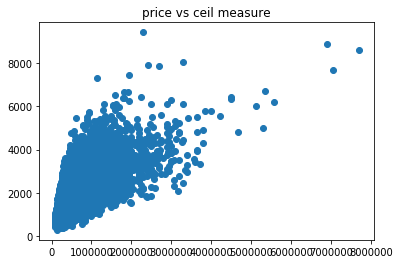

In [40]:
plt.scatter(house_df.price, house_df.ceil_measure)
plt.title("price vs ceil measure")

From above scatter we can state that:

Text(0.5, 1.0, 'price vs living measure 15')

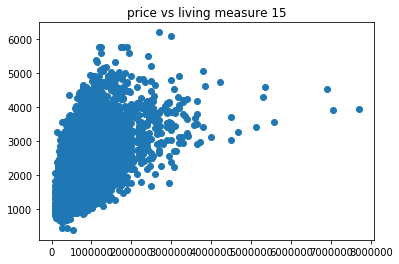

In [41]:
plt.scatter(house_df.price, house_df.living_measure15)
plt.title("price vs living measure 15")

Text(0.5, 1.0, 'price vs room bath')

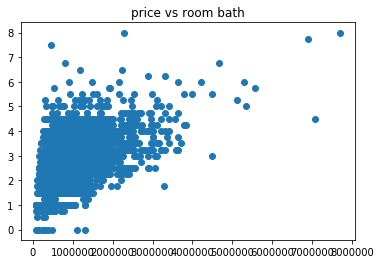

In [42]:
plt.scatter(house_df.price, house_df.room_bath)
plt.title("price vs room bath")

## density of house wrt lat. and lang.

Text(0.5, 67.99999999999994, 'Lattitude')

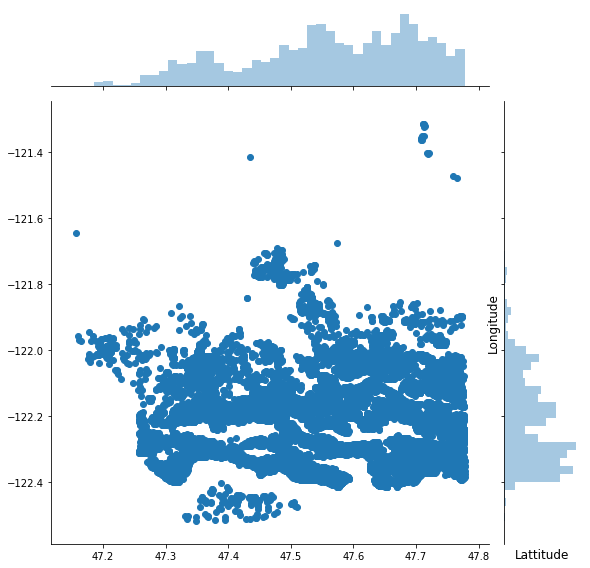

In [43]:
sns.jointplot(x=house_df.lat.values, y=house_df.long.values, size=8)
plt.ylabel('Longitude', fontsize=12)
plt.xlabel('Lattitude', fontsize=12)

By setting alpha 0.1 we can see high density areas

Text(0.5, 67.99999999999994, 'Lattitude')

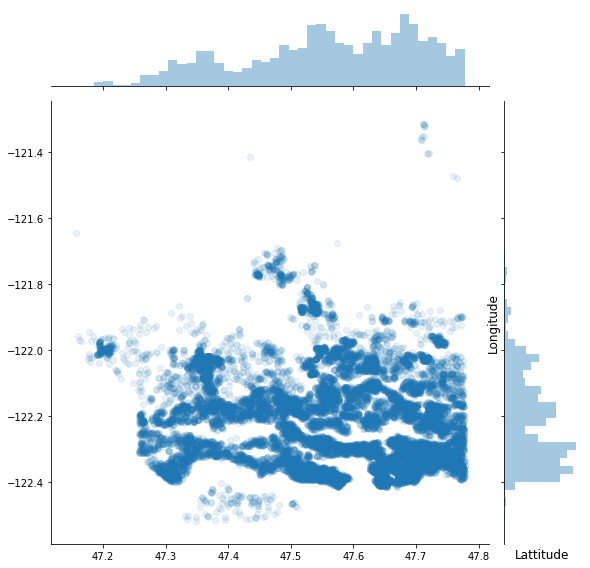

In [44]:
sns.jointplot(x=house_df.lat.values, y=house_df.long.values, size=8, alpha=0.1)
plt.ylabel('Longitude', fontsize=12)
plt.xlabel('Lattitude', fontsize=12)

From above jointplot we can see that, There are many house between latitude -47.7 and -47.8. From longitude we can see many houses in -122.2 to -122.4.

Text(0.5, 1.0, 'price vs longitude/area')

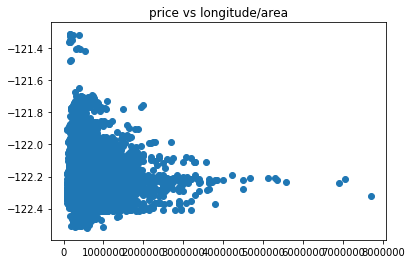

In [45]:
plt.scatter(house_df.price, house_df.long)
plt.title("price vs longitude/area")

From the above scatter plot we can say that houses in longitude area between -122.2 to -122.4 are sold at higher amount comparitively.

Text(0.5, 1.0, 'price vs latitude/area')

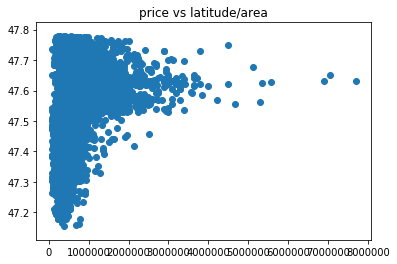

In [46]:
plt.scatter(house_df.price, house_df.lat)
plt.title("price vs latitude/area")

From the above scatter plot we can say that there are more houses in latitude between 47.7 to 47.8

Text(0.5, 1.0, 'price vs no of bedrooms')

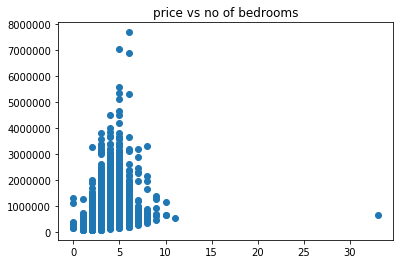

In [47]:
plt.scatter(house_df.room_bed, house_df.price)
plt.title("price vs no of bedrooms")

houses with 3/4 bedrooms are sold more.

Text(0.5, 1.0, 'price vs total area')

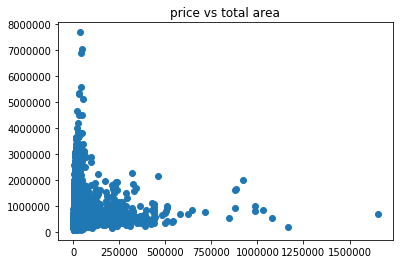

In [48]:
plt.scatter(house_df.total_area, house_df.price)
plt.title("price vs total area")

From above scatter plot, we can say that
1. Most of the houses are less than 500000 square feets total area.
2. Houses with total area less that 250000 square feet are sold to higher prices comparitively.

Text(0.5, 1.0, 'Coast vs Price')

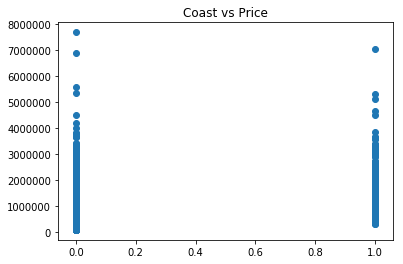

In [49]:
plt.scatter(house_df.coast,house_df.price)
plt.title("Coast vs Price")

Text(0, 0.5, 'count')

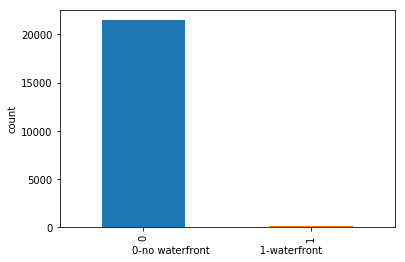

In [50]:
house_df['coast'].value_counts().plot(kind='bar')
plt.xlabel('0-no waterfront                1-waterfront')
plt.ylabel('count')

Most of the houses dont have view to waterfront and very few houses have waterfront view. The houses with waterfront are costlier than the ones with no waterfront

Text(0.5, 1.0, 'Furnished vs Price')

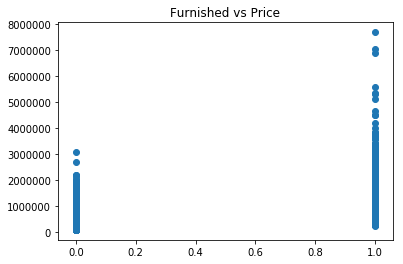

In [51]:
plt.scatter(house_df.furnished,house_df.price)
plt.title("Furnished vs Price")

Text(0, 0.5, 'count')

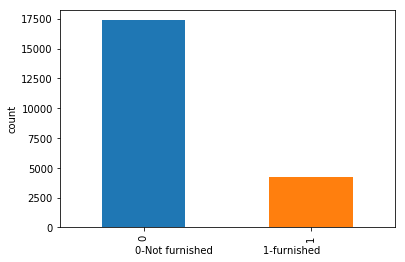

In [52]:
house_df['furnished'].value_counts().plot(kind='bar')
plt.xlabel('0-Not furnished                1-furnished')
plt.ylabel('count')

There are more houses which are not furnished and lesser houses are furnished. The furnished houses are costlier than the ones which are not furnished.

Text(0.5, 1.0, 'Condition vs Price')

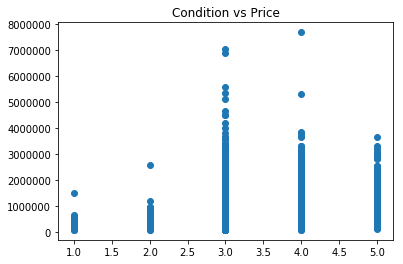

In [53]:
plt.scatter(house_df.condition,house_df.price)
plt.title("Condition vs Price")

Text(0, 0.5, 'count')

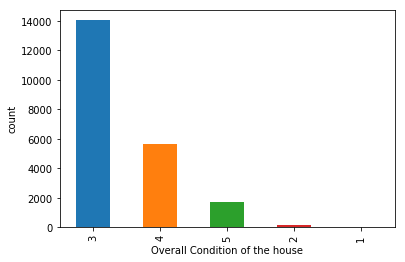

In [54]:
house_df['condition'].value_counts().plot(kind='bar')
plt.xlabel('Overall Condition of the house')
plt.ylabel('count')

The overall condition of most of the houses is 3 (good) followed by 4(better) and 5(best). There are few houses with 2(bad) followed by 1(Worst) condition too. From scatter plot we can say, better the condition of the house, costlier it is.

Text(0.5, 1.0, 'Quality-Grading System vs Price')

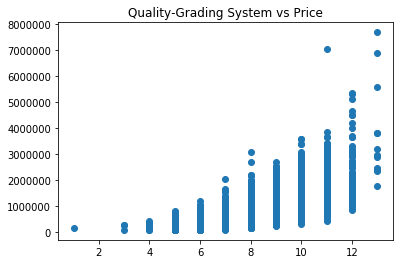

In [55]:
plt.scatter(house_df.quality,house_df.price)
plt.title("Quality-Grading System vs Price")

Text(0, 0.5, 'count')

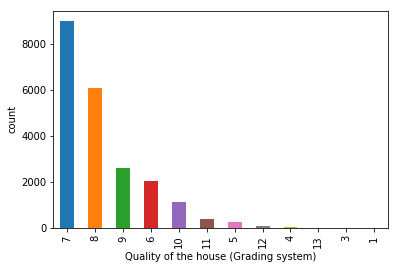

In [56]:
house_df['quality'].value_counts().plot(kind='bar')
plt.xlabel('Quality of the house (Grading system)')
plt.ylabel('count')

Very few or no houses are there with very high or very low quality. Most of the houses are graded 7 followed by 8 and 9. From scatter plot we can say, better the quality costlier the price the house is sold at.

Text(0.5, 1.0, 'House age built vs Price')

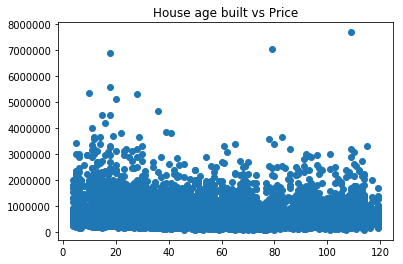

In [57]:
plt.scatter(house_df.house_age,house_df.price)
plt.title("House age built vs Price")

Text(0.5, 1.0, 'House age built/renovated vs Price')

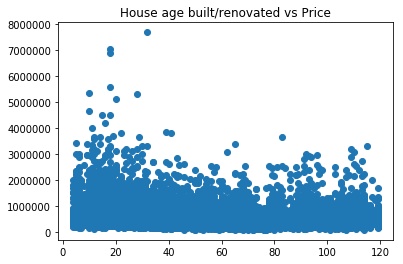

In [58]:
plt.scatter(house_df.recency,house_df.price)
plt.title("House age built/renovated vs Price")

We can say that recent the house(built/renovated) better the price, though this could be affected by the fact that the price could be affected by other factors too

Text(0, 0.5, 'count')

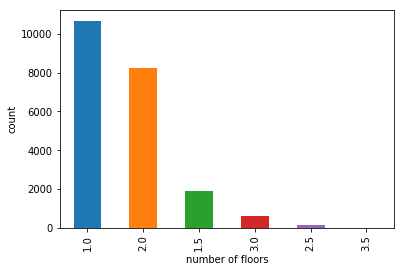

In [59]:
house_df.ceil.value_counts().plot(kind='bar')
plt.xlabel('number of floors')
plt.ylabel('count')

Text(0.5, 1.0, 'No of floors in the house vs Price')

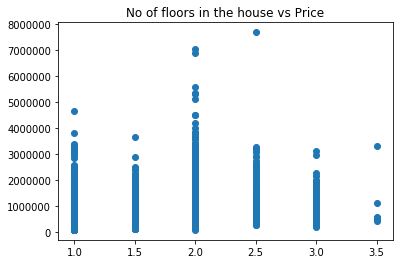

In [60]:
plt.scatter(house_df.ceil,house_df.price)
plt.title("No of floors in the house vs Price")

From bar plot we could say there are more houses with 1 floor followed by 2. From scatter plot we can say hoses with 2 floors are sold to higher prices than others.

In [12]:
def preprocess(path):
    """
    This function is used for preprocessing
    Args:
        path('string'): Input path of test.csv
        
    We are expecting that test.csv does not have any missing values as our standard data
    
    Output:
    This function returns a final preprocessed data frame that will be used for prediction
    This file may not contain the target column
    """
    df = pd.read_csv(path)
    try:
        df.drop('cid',axis=1,inplace=True)
    except:
        print('cid column is missing from data')
        
    labels = df['price']
    conv_dates = [1 if values == 2014 else 0 for values in df.dayhours ]
    df['dayhours'] = conv_dates
    
    #trying to get house many years ago the house was built
    import datetime as DT
    now = pd.Timestamp('now')
    df['house_age'] = now.year - df.yr_built
    
    df['recency'] = now.year - df.yr_renovated[df['yr_renovated'] != 0]
    
    #for the houses which are not renoveted we are keeping house_age itself
    df['recency'].fillna(df.house_age,inplace=True)
    
    return df

In [14]:
if 'price' in df.columns:
    print('hey')

hey


In [13]:
df = preprocess('innercity.csv')

# Liner Regression

In [17]:
model_df = house_df.drop(['price'],axis=1)

In [18]:
model_df.head()

dayhours  room_bed  room_bath  living_measure  lot_measure  ceil  coast  \
0         0         4       3.25            3020        13457   1.0      0   
1         0         4       2.50            2550         7500   1.0      0   
2         0         3       2.50            2370         4324   2.0      0   
3         0         2       1.00             820         3844   1.0      0   
4         0         2       1.50            1400         4050   1.0      0   

   sight  condition  quality   ...     yr_renovated  zipcode      lat  \
0      0          5        9   ...                0    98133  47.7174   
1      0          3        8   ...                0    98023  47.3165   
2      0          3        8   ...                0    98038  47.3515   
3      0          4        6   ...                0    98133  47.7049   
4      0          4        8   ...                0    98115  47.6768   

      long  living_measure15  lot_measure15  furnished  total_area  house_age  \
0 -122.336              2120           7553          1       16477         63   
1 -122.386              2260           8800          0       10050         43   
2 -121.999              2370           4348          0        6694         13   
3 -122.349              1520           3844          0        4664        103   
4 -122.269              1900           5940          0        5450         65   

   recency  
0     63.0  
1     43.0  
2     13.0  
3    103.0  
4     65.0  

[5 rows x 23 columns]

### splitting the data into train(70) and test(30)

In [19]:
x_train , x_test , y_train , y_test = train_test_split(model_df , labels , test_size = 0.30,random_state =20)

In [ ]:
def preprocess(path):
    df = pd.read_csv(path)
    try:
        house_df.drop('cid',axis=1,inplace=True)
    except:
        print('cid column is missing from data')

## Linear Regression

In [20]:
regression = LinearRegression()
regression.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [21]:
regression.score(x_test,y_test)

0.7082409572075857

## Gradient Boosting Regressor

In [22]:
from sklearn import ensemble
clf = ensemble.GradientBoostingRegressor(n_estimators = 400, max_depth = 5, min_samples_split = 2,
          learning_rate = 0.1, loss = 'ls')

In [23]:
clf.fit(x_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=5, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=400, n_iter_no_change=None, presort='auto',
             random_state=None, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

In [24]:
clf.score(x_test, y_test)

0.8900915847363933

## Random Forest Regressor

In [25]:
rfr_regressor = RandomForestRegressor(n_estimators =600, random_state = 0) 

In [26]:
rfr_regressor.fit(x_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=600, n_jobs=None,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

In [27]:
rfr_regressor.score(x_test, y_test)

0.8685892809771205

## Decision Tree Regressor

In [28]:
from scipy.stats import zscore
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO 
from IPython.display import Image 

In [29]:
dtr_regressor = DecisionTreeRegressor(random_state=0, max_depth=3)
dtr_regressor.fit(x_train , y_train)
feature_importances = dtr_regressor.feature_importances_

feature_names = model_df.columns[:]
print(feature_names)

k = 2
print(feature_importances)
top_k_idx = (feature_importances.argsort()[-k:][::-1])

print(feature_names[top_k_idx], feature_importances)

Index(['dayhours', 'room_bed', 'room_bath', 'living_measure', 'lot_measure',
       'ceil', 'coast', 'sight', 'condition', 'quality', 'ceil_measure',
       'basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'living_measure15', 'lot_measure15', 'furnished', 'total_area',
       'house_age', 'recency'],
      dtype='object')
[0.         0.         0.         0.33267958 0.         0.
 0.         0.         0.         0.51413887 0.         0.
 0.04913926 0.         0.         0.10404228 0.         0.
 0.         0.         0.         0.         0.        ]
Index(['quality', 'living_measure'], dtype='object') [0.         0.         0.         0.33267958 0.         0.
 0.         0.         0.         0.51413887 0.         0.
 0.04913926 0.         0.         0.10404228 0.         0.
 0.         0.         0.         0.         0.        ]


In [77]:
from IPython.display import Image  
from sklearn import tree
from os import system

model_df_Tree_File = open('Documents:\model_df_tree.dot','w')
dot_data = tree.export_graphviz(dtr_regressor, out_file=model_df_Tree_File, feature_names =(['dayhours', 'room_bed', 'room_bath', 'living_measure', 'lot_measure',
       'ceil', 'coast', 'sight', 'condition', 'quality', 'ceil_measure',
       'basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'living_measure15', 'lot_measure15', 'furnished', 'total_area',
       'house_age', 'recency']) )
model_df_Tree_File.close()

# importance of features in the tree building ( The importance of a feature is computed as the 
#(normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

#system("dot -Tpng Documents:\model_df_tree.dot -o Documents:/model_df_tree.png")
#Image("d:\model_df_tree.png")

OSError: [Errno 22] Invalid argument: 'Documents:\\model_df_tree.dot'

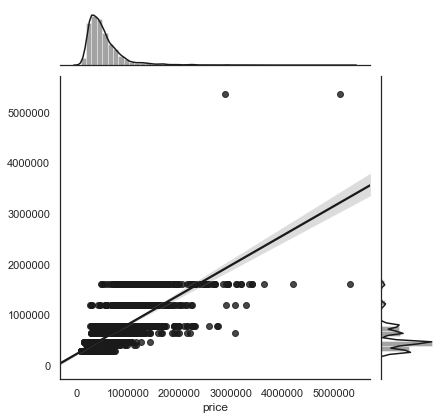

In [30]:
y_pred = dtr_regressor.predict(x_test)
import seaborn as sns
import seaborn as sns
sns.set(style="darkgrid", color_codes=True)

            
#g = sns.jointplot("y_actuals", "y_predicted", data=tips, kind="reg",
#                  xlim=(0, 60), ylim=(0, 12), color="r", size=7)
            
with sns.axes_style("white"):
    sns.jointplot(x=y_test, y=y_pred, kind="reg", color="k");

In [30]:
dtr_regressor.score(x_test, y_test)

0.5851041930326535

## KNN Regression

In [31]:
from sklearn import neighbors
from sklearn.metrics import mean_squared_error 
from math import sqrt
import matplotlib.pyplot as plt

In [32]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

x_train_scaled = scaler.fit_transform(x_train)
x_train1 = pd.DataFrame(x_train_scaled)

x_test_scaled = scaler.fit_transform(x_test)
x_test1 = pd.DataFrame(x_test_scaled)

In [33]:
rmse_val = [] #to store rmse values for different k
for K in range(20):
    K = K+1
    knn_model = neighbors.KNeighborsRegressor(n_neighbors = K)

    knn_model.fit(x_train1, y_train)  #fit the model
    pred=knn_model.predict(x_test1) #make prediction on test set
    error = sqrt(mean_squared_error(y_test,pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)

RMSE value for k=  1 is: 267860.0496976686
RMSE value for k=  2 is: 221616.89678115293
RMSE value for k=  3 is: 210681.96004944612
RMSE value for k=  4 is: 203063.17692916503
RMSE value for k=  5 is: 195165.37614511987
RMSE value for k=  6 is: 189807.89960105182
RMSE value for k=  7 is: 184890.6776821891
RMSE value for k=  8 is: 182630.97785420102
RMSE value for k=  9 is: 181370.4191410745
RMSE value for k=  10 is: 181121.02089605352
RMSE value for k=  11 is: 180435.8214103059
RMSE value for k=  12 is: 178664.75467885527
RMSE value for k=  13 is: 178898.19796432796
RMSE value for k=  14 is: 177877.99283212938
RMSE value for k=  15 is: 178293.8714675076
RMSE value for k=  16 is: 178707.8131518338
RMSE value for k=  17 is: 179642.23382711556
RMSE value for k=  18 is: 179539.1420336889
RMSE value for k=  19 is: 179646.72030427668
RMSE value for k=  20 is: 179687.6280162324


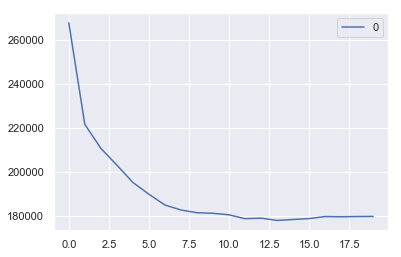

In [35]:
#plotting the rmse values against k values
curve = pd.DataFrame(rmse_val) #elbow curve 
curve.plot()

## storing results of all the models in single array

In [34]:
# storing results of all the models in single array
model_scores = []
acc_scr = dict()
reg_scr = regression.score(x_test,y_test)
acc_scr['Linear Regression']=reg_scr

#model_scores.append(acc_scr)

gbr_scr = clf.score(x_test, y_test)
rfr_scr = rfr_regressor.score(x_test, y_test)
dtr_scr = dtr_regressor.score(x_test, y_test)
knn_scr = knn_model.score(x_test1, y_test)

acc_scr['Gradiant Boosting Regressor']=gbr_scr
acc_scr['Random Forest Regressor']=gbr_scr
acc_scr['Decision Tree Regressor']=dtr_scr
acc_scr['KNN']=knn_scr

In [35]:
acc_scr

{'Linear Regression': 0.7082409572075857,
 'Gradiant Boosting Regressor': 0.8900915847363933,
 'Random Forest Regressor': 0.8900915847363933,
 'Decision Tree Regressor': 0.5851041930326535,
 'KNN': 0.7585063850700703}

### From the model scores print above, we can see that Gradiant Boosting Regressor and Random Forest Regressor are performing best amongst all.

#### Lets try different values for hyper parameters to get best model performance 

    1. n_estimators

In [86]:
n_estimators = [50, 100, 200, 400, 600, 800]
train_results = []
test_results = []
for n_estimator in n_estimators:
    clf = ensemble.GradientBoostingRegressor(n_estimators = n_estimator)
    clf.fit(x_train, y_train)
    print("n_estimator: ", n_estimator)
    print("Accuracy score (training): {0:.3f}".format(clf.score(x_train, y_train)))
    print("Accuracy score (validation): {0:.3f}".format(clf.score(x_test, y_test)))

n_estimator:  50
Accuracy score (training): 0.876
Accuracy score (validation): 0.839
n_estimator:  100
Accuracy score (training): 0.907
Accuracy score (validation): 0.861
n_estimator:  200
Accuracy score (training): 0.925
Accuracy score (validation): 0.872
n_estimator:  400
Accuracy score (training): 0.941
Accuracy score (validation): 0.878
n_estimator:  600
Accuracy score (training): 0.951
Accuracy score (validation): 0.881
n_estimator:  800
Accuracy score (training): 0.957
Accuracy score (validation): 0.883


    2. Learning Rate: learning rate shrinks the contribution of each tree by learning_rate.

In [87]:
lr_list = [0.05, 0.075, 0.1, 0.25, 0.5, 0.75, 1]

for learning_rate in lr_list:
    clf = ensemble.GradientBoostingRegressor(n_estimators = 600, learning_rate=learning_rate,  loss = 'ls')
    clf.fit(x_train, y_train)
#     GradientBoostingRegressor(n_estimators = 400, max_depth = 5, min_samples_split = 2,
#           learning_rate = 0.1, loss = 'ls')

    print("Learning rate: ", learning_rate)
    print("Accuracy score (training): {0:.3f}".format(clf.score(x_train, y_train)))
    print("Accuracy score (validation): {0:.3f}".format(clf.score(x_test, y_test)))


Learning rate:  0.05
Accuracy score (training): 0.934
Accuracy score (validation): 0.875
Learning rate:  0.075
Accuracy score (training): 0.944
Accuracy score (validation): 0.878
Learning rate:  0.1
Accuracy score (training): 0.951
Accuracy score (validation): 0.879
Learning rate:  0.25
Accuracy score (training): 0.969
Accuracy score (validation): 0.873
Learning rate:  0.5
Accuracy score (training): 0.979
Accuracy score (validation): 0.856
Learning rate:  0.75
Accuracy score (training): 0.983
Accuracy score (validation): 0.823
Learning rate:  1
Accuracy score (training): 0.984
Accuracy score (validation): 0.812


    3. Max_Depths: indicates how deep the built tree can be. The deeper the tree, the more splits it has and it captures more information about how the data. We fit a decision tree with depths ranging from 1 to 10.

In [88]:
max_depths = np.linspace(1, 10, 10, endpoint=True)
train_results = []
test_results = []
for max_depth in max_depths:
    clf = ensemble.GradientBoostingRegressor(n_estimators=600, max_depth = max_depth, learning_rate = 0.1)
    clf.fit(x_train, y_train)
    print("Max Depth: ", max_depth)
    print("Accuracy score (training): {0:.3f}".format(clf.score(x_train, y_train)))
    print("Accuracy score (validation): {0:.3f}".format(clf.score(x_test, y_test)))

Max Depth:  1.0
Accuracy score (training): 0.836
Accuracy score (validation): 0.810
Max Depth:  2.0
Accuracy score (training): 0.920
Accuracy score (validation): 0.862
Max Depth:  3.0
Accuracy score (training): 0.951
Accuracy score (validation): 0.880
Max Depth:  4.0
Accuracy score (training): 0.969
Accuracy score (validation): 0.889
Max Depth:  5.0
Accuracy score (training): 0.982
Accuracy score (validation): 0.889
Max Depth:  6.0
Accuracy score (training): 0.991
Accuracy score (validation): 0.876
Max Depth:  7.0
Accuracy score (training): 0.996
Accuracy score (validation): 0.878
Max Depth:  8.0
Accuracy score (training): 0.998
Accuracy score (validation): 0.871
Max Depth:  9.0
Accuracy score (training): 0.999
Accuracy score (validation): 0.861
Max Depth:  10.0
Accuracy score (training): 0.999
Accuracy score (validation): 0.849


    4. min_samples_splits

In [89]:
min_samples_splits = [0.1,0.5,1.0, 2, 3, 4]
train_results = []
test_results = []
for min_samples_split in min_samples_splits:
    clf = ensemble.GradientBoostingRegressor(n_estimators=600, learning_rate=0.1, max_depth=4,
                                             min_samples_split = min_samples_split)
    clf.fit(x_train, y_train)
    print("Min_Sample_splits: ", min_samples_split)
    print("Accuracy score (training): {0:.3f}".format(clf.score(x_train, y_train)))
    print("Accuracy score (validation): {0:.3f}".format(clf.score(x_test, y_test)))

Min_Sample_splits:  0.1
Accuracy score (training): 0.942
Accuracy score (validation): 0.879
Min_Sample_splits:  0.5
Accuracy score (training): 0.916
Accuracy score (validation): 0.858
Min_Sample_splits:  1.0
Accuracy score (training): 0.836
Accuracy score (validation): 0.810
Min_Sample_splits:  2
Accuracy score (training): 0.969
Accuracy score (validation): 0.889
Min_Sample_splits:  3
Accuracy score (training): 0.969
Accuracy score (validation): 0.886
Min_Sample_splits:  4
Accuracy score (training): 0.969
Accuracy score (validation): 0.886


    5. min_samples_leaf

In [90]:
min_samples_leafs = [0.1, 0.5, 1, 2, 3, 4, 5]
train_results = []
test_results = []
for min_samples_leaf in min_samples_leafs:
    clf = ensemble.GradientBoostingRegressor(min_samples_leaf = min_samples_leaf, n_estimators=600, learning_rate=0.1, max_depth=4,
                                             min_samples_split = 2)
    clf.fit(x_train, y_train)
    print("min_samples_leafs: ", min_samples_leaf)
    print("Accuracy score (training): {0:.3f}".format(clf.score(x_train, y_train)))
    print("Accuracy score (validation): {0:.3f}".format(clf.score(x_test, y_test)))

min_samples_leafs:  0.1
Accuracy score (training): 0.790
Accuracy score (validation): 0.800
min_samples_leafs:  0.5
Accuracy score (training): 0.000
Accuracy score (validation): -0.000
min_samples_leafs:  1
Accuracy score (training): 0.969
Accuracy score (validation): 0.888
min_samples_leafs:  2
Accuracy score (training): 0.970
Accuracy score (validation): 0.889
min_samples_leafs:  3
Accuracy score (training): 0.968
Accuracy score (validation): 0.888
min_samples_leafs:  4
Accuracy score (training): 0.968
Accuracy score (validation): 0.888
min_samples_leafs:  5
Accuracy score (training): 0.968
Accuracy score (validation): 0.886


    6. max_Features

In [91]:
max_features = list(range(1,model_df.shape[1]))
train_results = []
test_results = []
for max_feature in max_features:
    clf = ensemble.GradientBoostingRegressor(max_features = max_feature,n_estimators=600, learning_rate=0.1, max_depth=4,
                                             min_samples_split = min_samples_split)
    clf.fit(x_train, y_train)
    print("max_features: ", max_feature)
    print("Accuracy score (training): {0:.3f}".format(clf.score(x_train, y_train)))
    print("Accuracy score (validation): {0:.3f}".format(clf.score(x_test, y_test)))

max_features:  1
Accuracy score (training): 0.944
Accuracy score (validation): 0.868
max_features:  2
Accuracy score (training): 0.956
Accuracy score (validation): 0.887
max_features:  3
Accuracy score (training): 0.960
Accuracy score (validation): 0.888
max_features:  4
Accuracy score (training): 0.963
Accuracy score (validation): 0.890
max_features:  5
Accuracy score (training): 0.964
Accuracy score (validation): 0.895
max_features:  6
Accuracy score (training): 0.966
Accuracy score (validation): 0.898
max_features:  7
Accuracy score (training): 0.966
Accuracy score (validation): 0.890
max_features:  8
Accuracy score (training): 0.966
Accuracy score (validation): 0.895
max_features:  9
Accuracy score (training): 0.968
Accuracy score (validation): 0.892
max_features:  10
Accuracy score (training): 0.968
Accuracy score (validation): 0.890
max_features:  11
Accuracy score (training): 0.968
Accuracy score (validation): 0.889
max_features:  12
Accuracy score (training): 0.968
Accuracy sco

Collating all the individual hyper parameters, we can check the model score:

In [90]:
clf = ensemble.GradientBoostingRegressor(n_estimators = 600, max_depth = 4, min_samples_split = 2,max_features= 4,
          min_samples_leaf=2, learning_rate = 0.1, loss = 'ls')
clf.fit(x_train, y_train)
clf.score(x_test, y_test)

0.8980129566827489

### Max Score with GBR : 89.80%

### RANDOM FOREST REGRESSOR

In [36]:
from sklearn.model_selection import RandomizedSearchCV
from pprint import pprint

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 20, stop = 200, num = 5)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(1, 45, num = 3)]
# Minimum number of samples required to split a node
min_samples_split = [5, 10]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split}

pprint(random_grid)

{'max_depth': [1, 23, 45],
 'max_features': ['auto', 'sqrt'],
 'min_samples_split': [5, 10],
 'n_estimators': [20, 65, 110, 155, 200]}


In [41]:
# Use the random grid to search for best hyperparameters
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf= RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 10, cv = 10, verbose=2, random_state=42, n_jobs = -1,scoring='neg_mean_squared_error')
# Fit the random search model
rf.fit(x_train, y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   15.9s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  2.7min finished


RandomizedSearchCV(cv=10, error_score='raise-deprecating',
          estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
          fit_params=None, iid='warn', n_iter=10, n_jobs=-1,
          param_distributions={'n_estimators': [20, 65, 110, 155, 200], 'max_features': ['auto', 'sqrt'], 'max_depth': [1, 23, 45], 'min_samples_split': [5, 10]},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          return_train_score='warn', scoring='neg_mean_squared_error',
          verbose=2)

In [42]:
#now let's how the RMSE changes for each parameter configuration
cvres2 = rf.cv_results_
for mean_score, params in zip(cvres2["mean_test_score"], cvres2["params"]):
    print(np.sqrt(-mean_score), params)

289782.67259554437 {'n_estimators': 20, 'min_samples_split': 5, 'max_features': 'auto', 'max_depth': 1}
290921.2919225295 {'n_estimators': 20, 'min_samples_split': 10, 'max_features': 'auto', 'max_depth': 1}
142258.35632259795 {'n_estimators': 65, 'min_samples_split': 10, 'max_features': 'sqrt', 'max_depth': 23}
131594.3532943382 {'n_estimators': 20, 'min_samples_split': 10, 'max_features': 'auto', 'max_depth': 45}
296827.4455204332 {'n_estimators': 155, 'min_samples_split': 5, 'max_features': 'sqrt', 'max_depth': 1}
137934.2532211151 {'n_estimators': 200, 'min_samples_split': 5, 'max_features': 'sqrt', 'max_depth': 45}
138447.1183554042 {'n_estimators': 155, 'min_samples_split': 5, 'max_features': 'sqrt', 'max_depth': 23}
128755.48395197558 {'n_estimators': 155, 'min_samples_split': 10, 'max_features': 'auto', 'max_depth': 45}
297329.5317137579 {'n_estimators': 110, 'min_samples_split': 5, 'max_features': 'sqrt', 'max_depth': 1}
140816.79077674574 {'n_estimators': 110, 'min_samples_sp

In [43]:
# best random model 
rf.best_estimator_

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=45,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=10,
           min_weight_fraction_leaf=0.0, n_estimators=155, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [44]:
# best combination of parameters of random search
rf.best_params_

{'n_estimators': 155,
 'min_samples_split': 10,
 'max_features': 'auto',
 'max_depth': 45}

In [47]:
rfr_regressor = RandomForestRegressor(n_estimators= 155 ,max_features="auto", max_depth= 45,min_samples_split=10)
rfr_regressor.fit(x_train,y_train)
print("Accuracy score (training): {0:.3f}".format(clf.score(x_train, y_train)))
print("Accuracy score (validation): {0:.3f}".format(clf.score(x_test, y_test)))

Accuracy score (training): 0.976
Accuracy score (validation): 0.890


# Max Score with Random Forest 89%